# Charge on a plate
Slightly more advanced method of moments where we try to calculate the electrostatic charge on a plate.

## Notes
Still interested in the calculation of the positional information. I am guessing that the X_m, y_m are the integer numbers since the dx is already involved? Perhaps then the charge on a line is meant to be integers. 

In [47]:
import numpy as np
from scipy.sparse.linalg import cg as conjgradsolve
import matplotlib.pyplot as plt

def charge_on_a_plate():
    
    def build_matrix(n,dx,a=0):
        output = []
        #output.append(0)
        j = 0
        diag = (2*a/np.pi)*np.log(1+np.sqrt(2))
        out_matrix = []
        mid = int(n/2)
        for i in range(n+1):
            row = []
            for i in range(n+1):
                if i == j:
                    row.append(diag)
                else:
                    znm = dx/(np.sqrt((i-mid)**2)+(j-mid)**2) #
                    row.append(znm)
            j += 1
            print(row)
            out_matrix.append(row)
            
        out_matrix = np.array(out_matrix)
        return out_matrix
        
        
    bm = 1 #4*np.pi#*8.854e-12 # normalise
    n = 225 
    dx = 1/(n+1)
    
    a_matrix = build_matrix(n,dx)
    b_matrix = [bm for x in a_matrix] # no description of how bm should be formed. Odd that it wouldnt chnage. 
    
    #b_matrix[-1] = 0 # boundary conditions zero field on ends
    #b_matrix[0] = 0 # perhaps these are artificial and the issue is in the matirx
    solution = conjgradsolve(a_matrix,b_matrix, tol=1e-9)
    
    plt.plot(abs(solution[0]*8.854e-12*4*np.pi))
    plt.show()

[0.0, 3.5120066728126783e-07, 3.5122842140386e-07, 3.5125617991341534e-07, 3.5128394281097413e-07, 3.513117100975768e-07, 3.513394817742644e-07, 3.5136725784207797e-07, 3.513950383020592e-07, 3.5142282315524984e-07, 3.514506124026921e-07, 3.514784060454286e-07, 3.5150620408450207e-07, 3.515340065209558e-07, 3.5156181335583327e-07, 3.5158962459017836e-07, 3.5161744022503516e-07, 3.5164526026144827e-07, 3.5167308470046246e-07, 3.517009135431229e-07, 3.5172874679047517e-07, 3.5175658444356507e-07, 3.517844265034387e-07, 3.518122729711426e-07, 3.5184012384772357e-07, 3.5186797913422885e-07, 3.518958388317058e-07, 3.5192370294120234e-07, 3.519515714637666e-07, 3.51979444400447e-07, 3.5200732175229243e-07, 3.52035203520352e-07, 3.5206308970567524e-07, 3.520909803093119e-07, 3.521188753323122e-07, 3.521467747757265e-07, 3.5217467864060576e-07, 3.52202586928001e-07, 3.5223049963896373e-07, 3.522584167745458e-07, 3.522863383357993e-07, 3.5231426432377683e-07, 3.5234219473953103e-07, 3.523701295

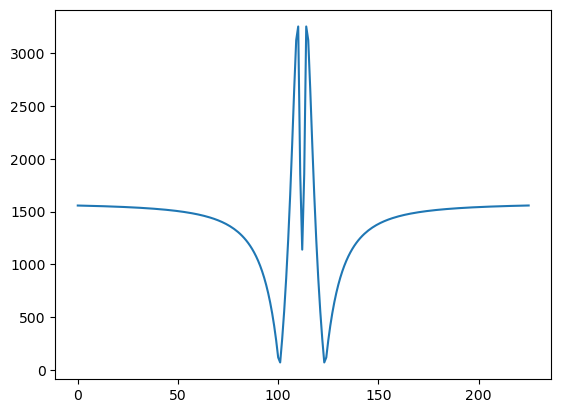

In [48]:
charge_on_a_plate()